In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

## Combine all data of fires in Portugal in available years  

In [12]:
import pandas as pd

# List to store all the dataframes
dfs = []

# Path to your CSV files
folder_path = "Data/Portugal_Fires"  # Update the path accordingly

# Loop over files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        try:
            # Extract year from file name
            year = int(file_name.split('_')[1])
            # Load CSV file into a dataframe
            df = pd.read_csv(os.path.join(folder_path, file_name))
            # Add a 'Year' column to the dataframe
            df['Year'] = year
            # Append dataframe to the list
            dfs.append(df)
        except Exception as e:
            print(f"Error processing file {file_name}: {e}")

# Concatenate all dataframes into a single dataframe
portugal_fires = pd.concat(dfs, ignore_index=True)

# Now you have all your data in combined_df


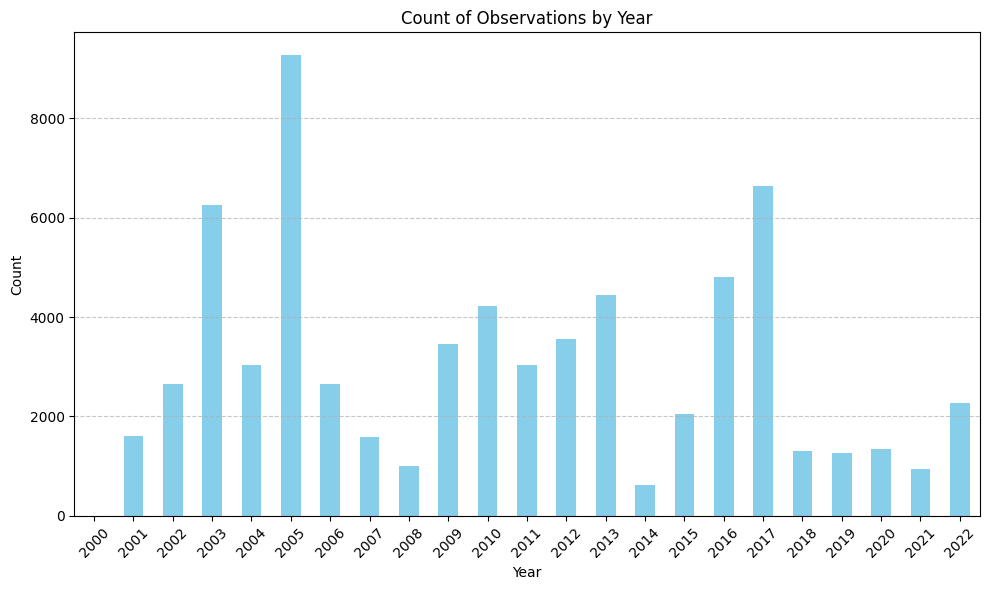

In [13]:
year_counts = portugal_fires['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Observations by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
portugal_fires.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,Year
0,39.4605,-8.5570,300.6,1.0,1.0,2000-11-06,1151,Terra,MODIS,40,6.2,287.8,4.9,D,0,2000
1,37.7087,-7.7873,306.6,1.0,1.0,2000-11-08,1139,Terra,MODIS,64,6.2,286.7,6.2,D,0,2000
2,37.6988,-7.7845,327.9,1.0,1.0,2000-11-08,1139,Terra,MODIS,85,6.2,290.6,26.2,D,0,2000
3,32.7630,-17.2021,307.5,1.0,1.0,2001-02-13,2323,Terra,MODIS,54,6.2,282.2,12.0,N,0,2001
4,41.4451,-7.6717,306.9,1.0,1.0,2001-02-19,1142,Terra,MODIS,64,6.2,283.2,9.9,D,0,2001


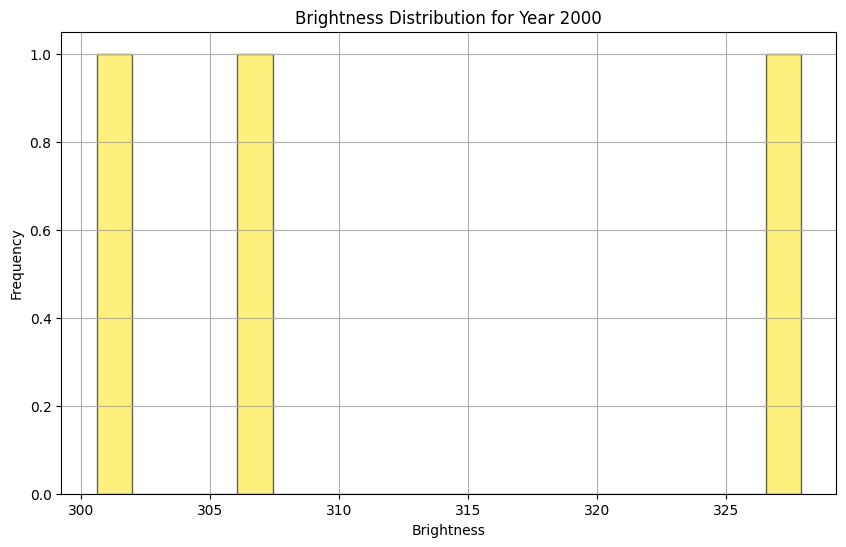

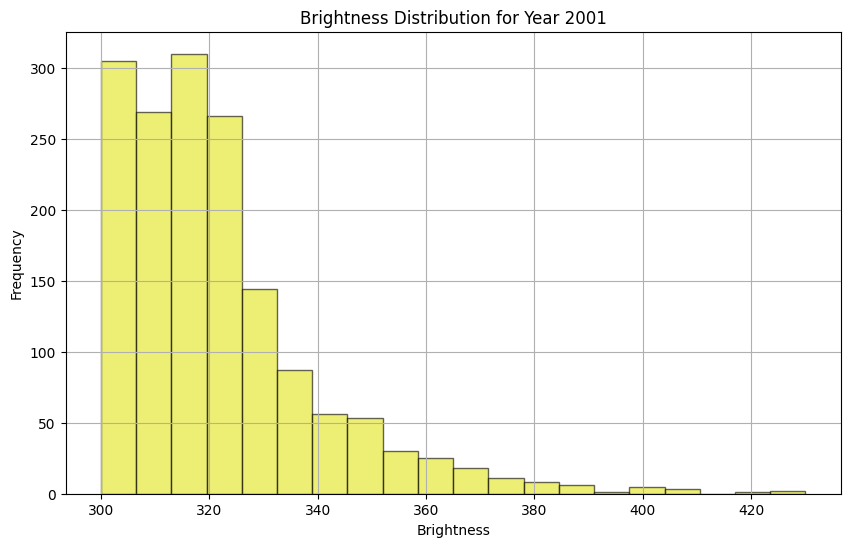

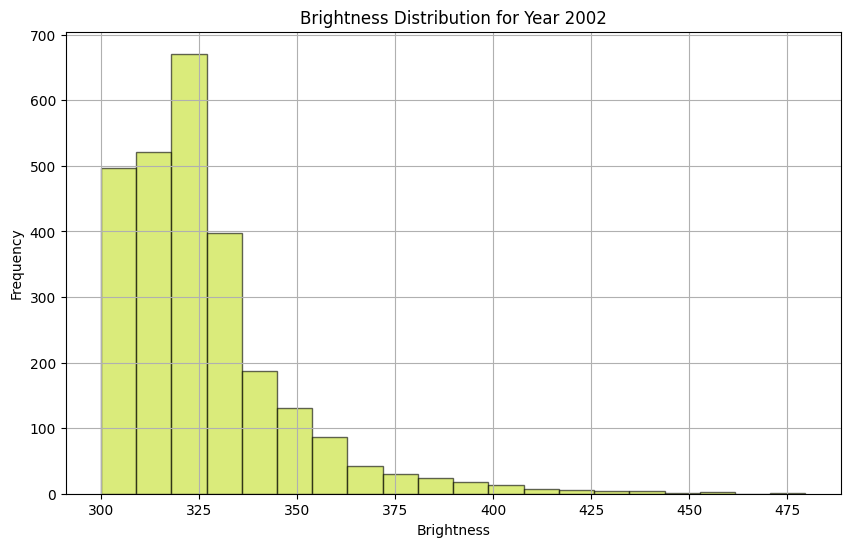

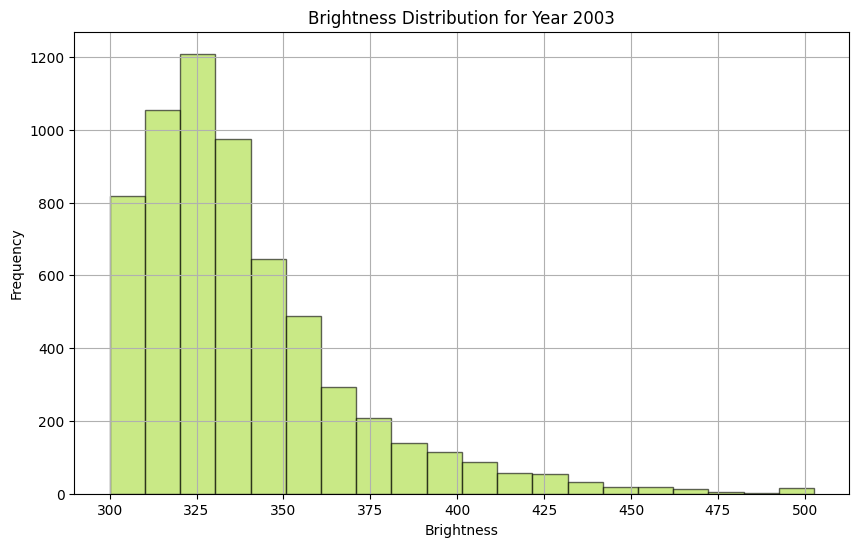

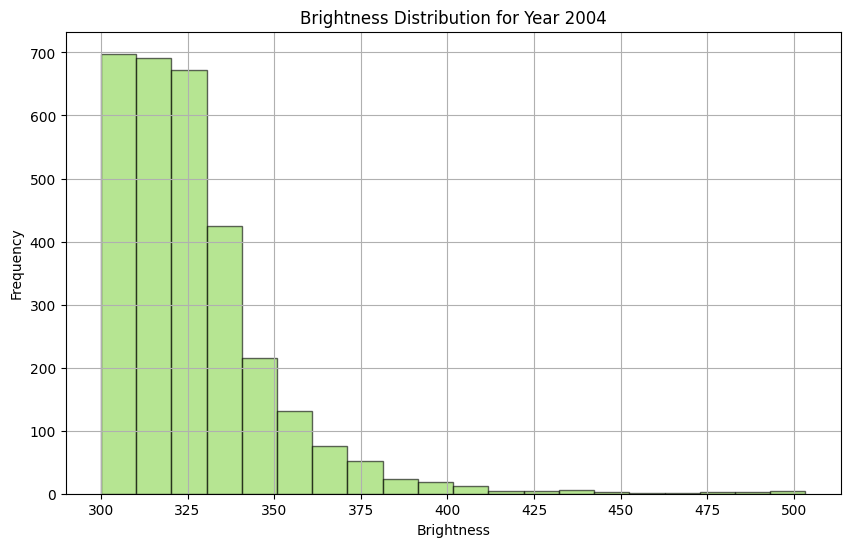

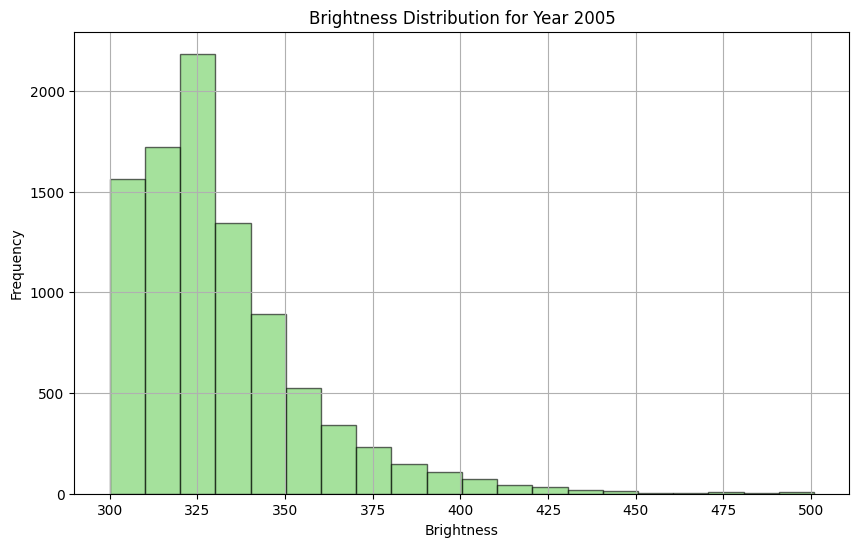

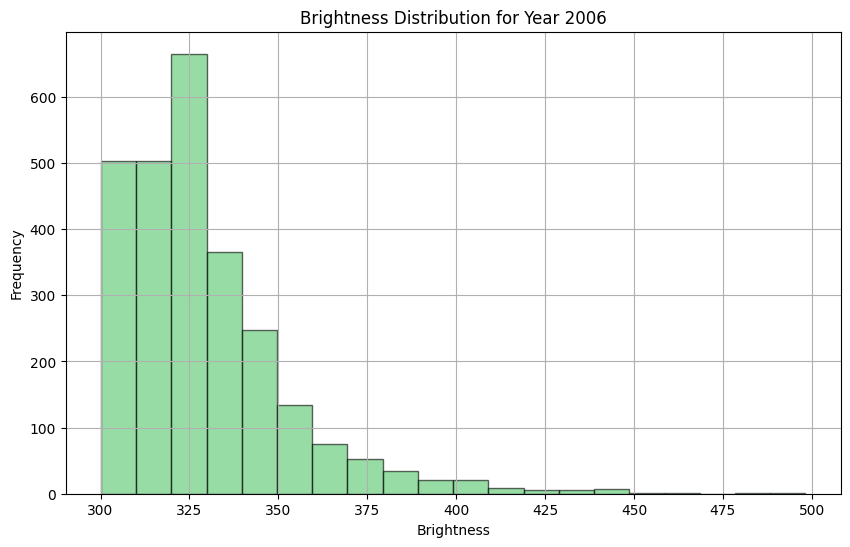

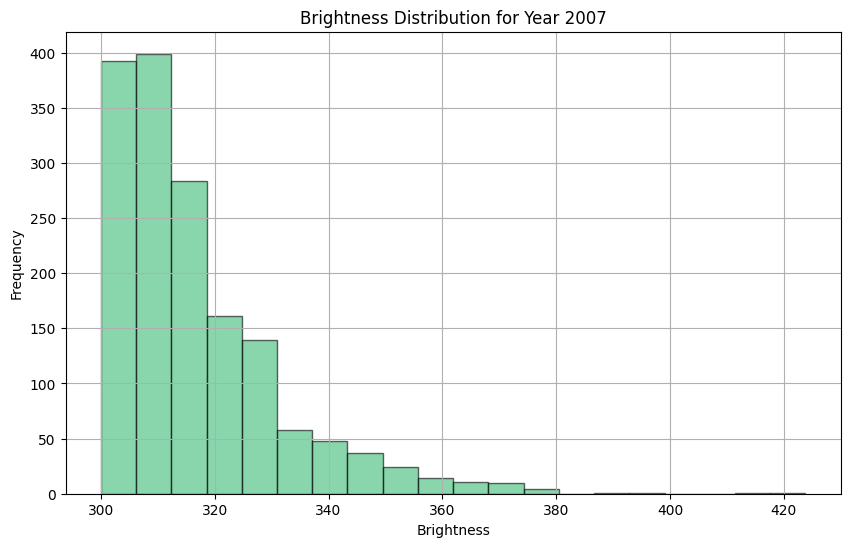

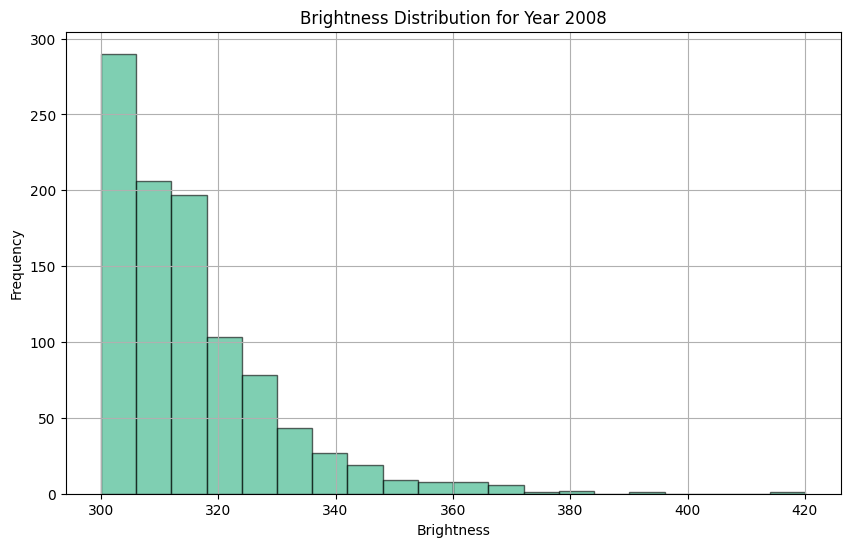

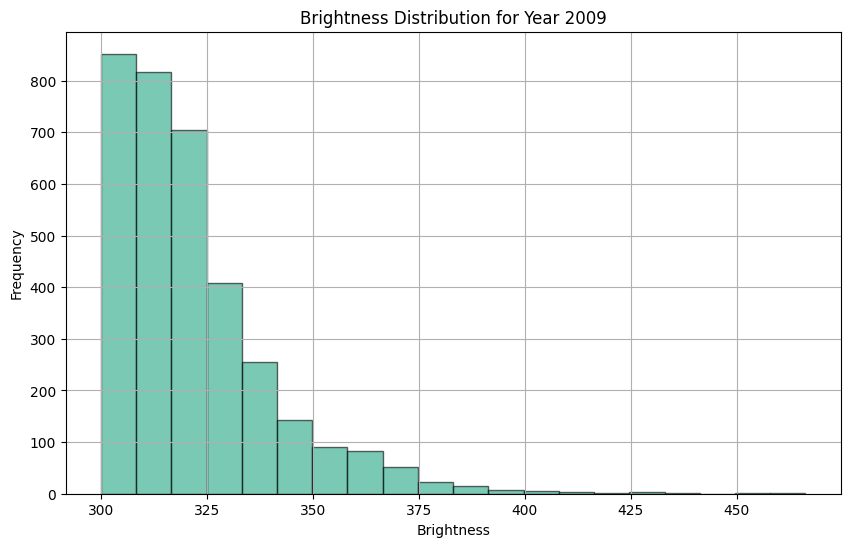

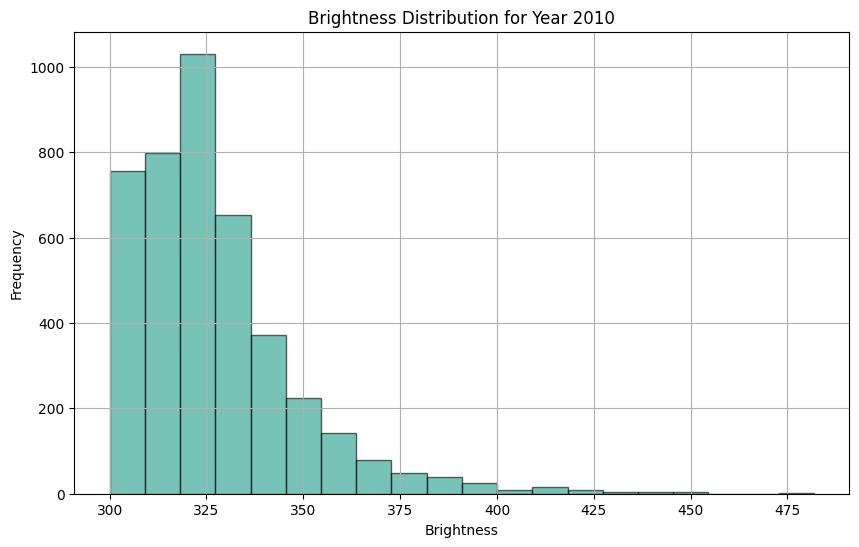

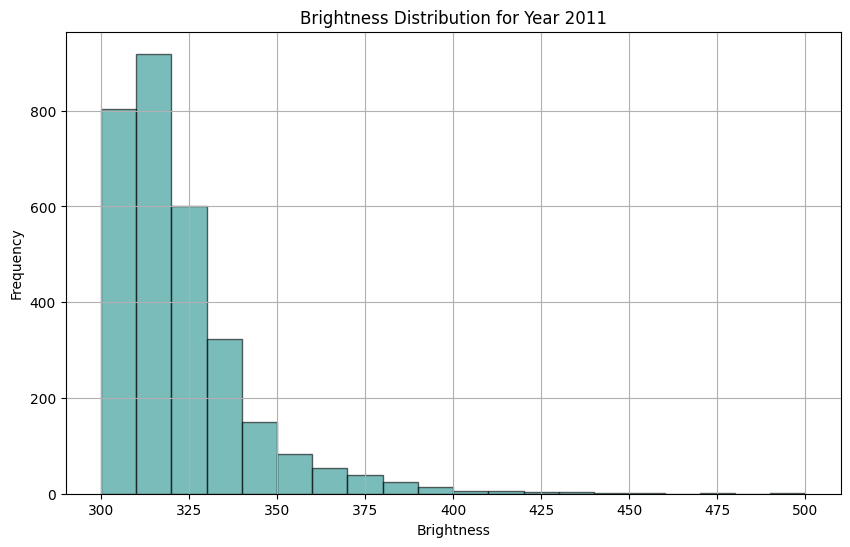

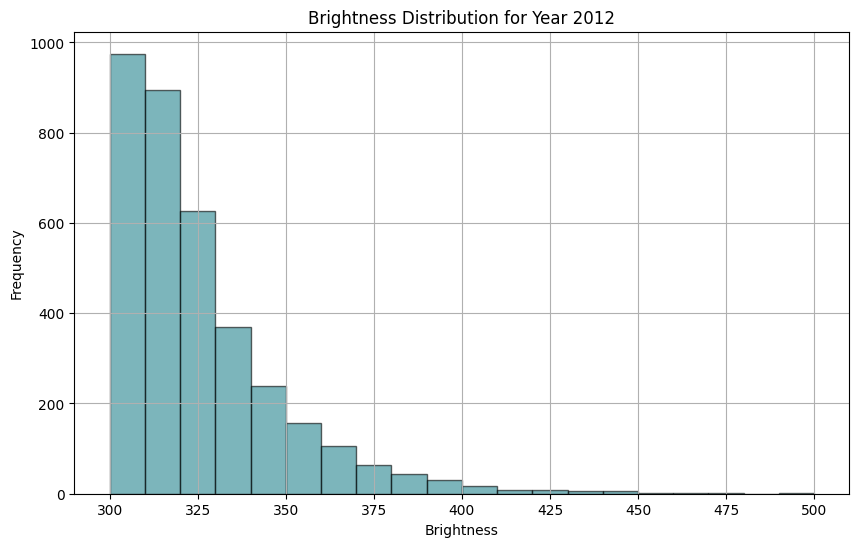

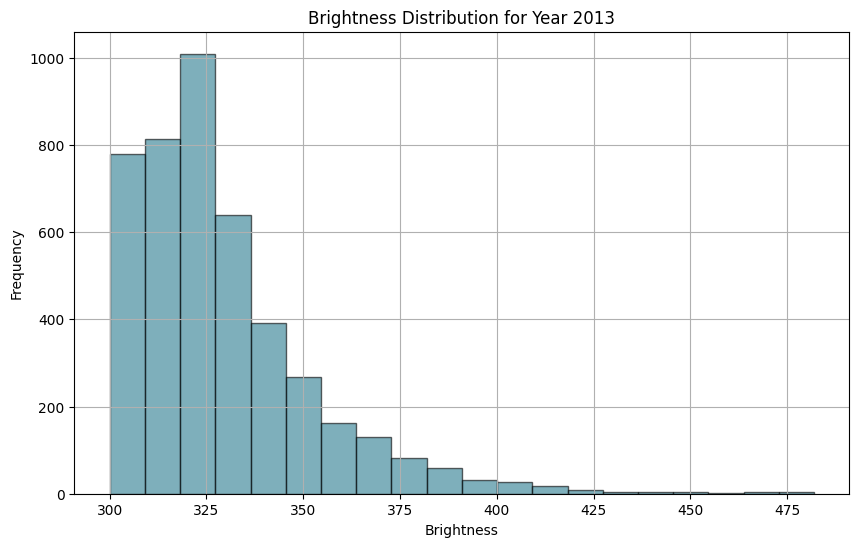

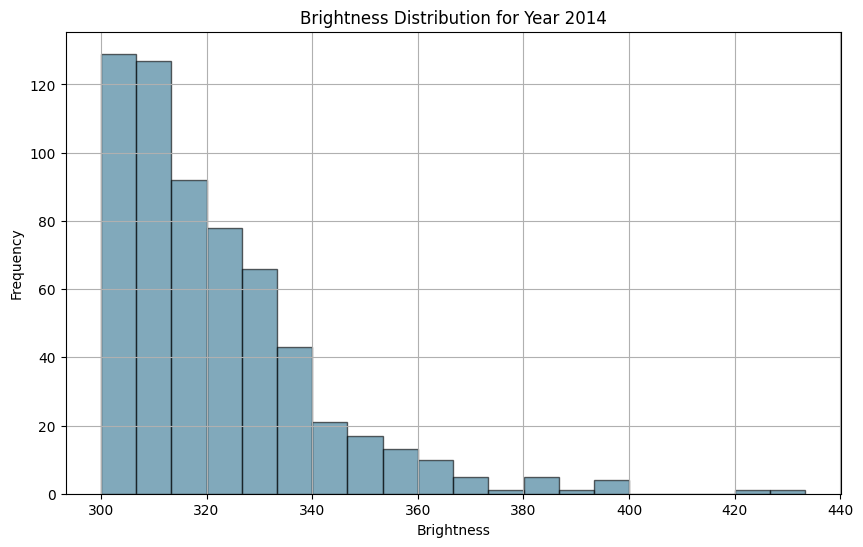

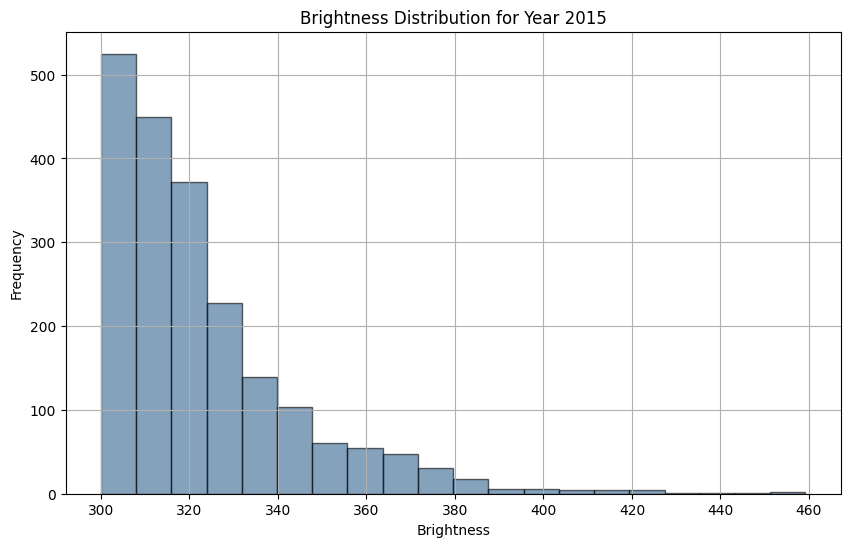

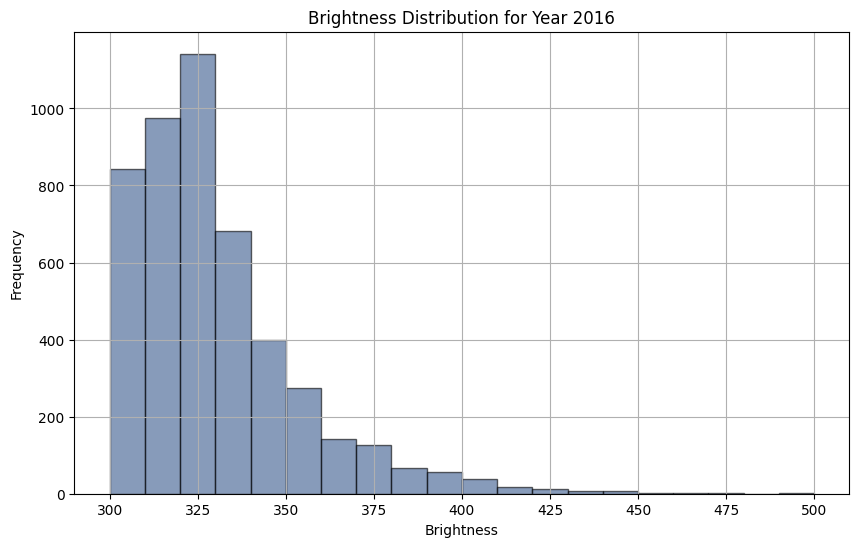

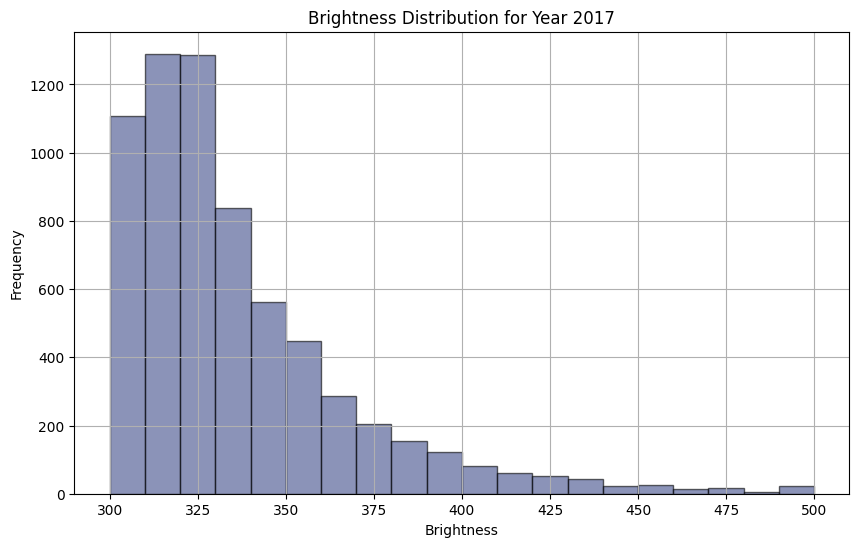

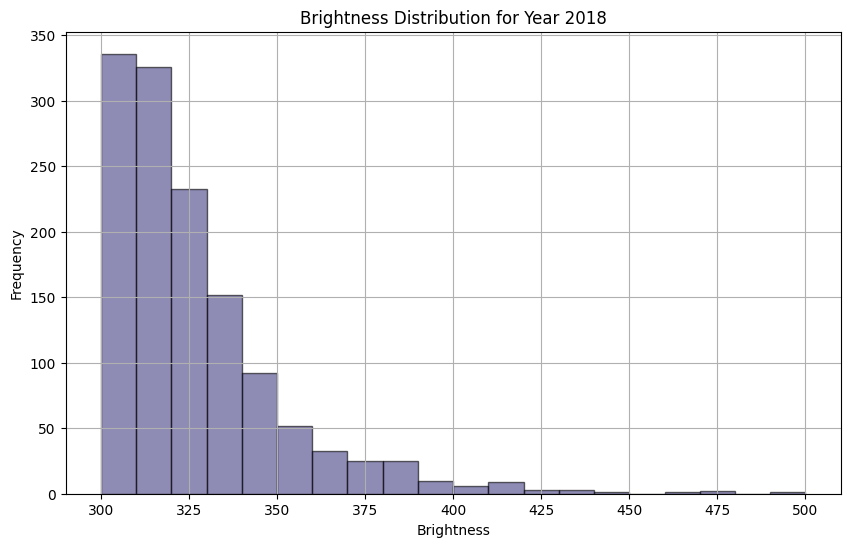

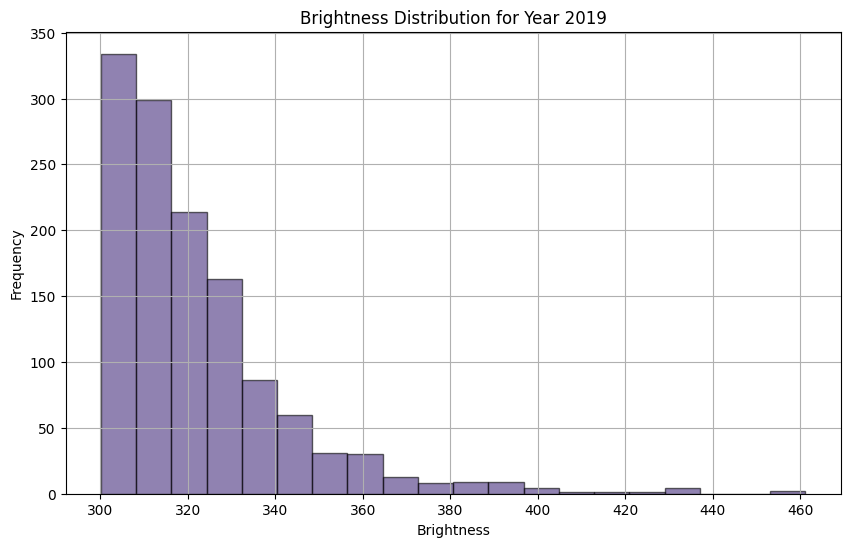

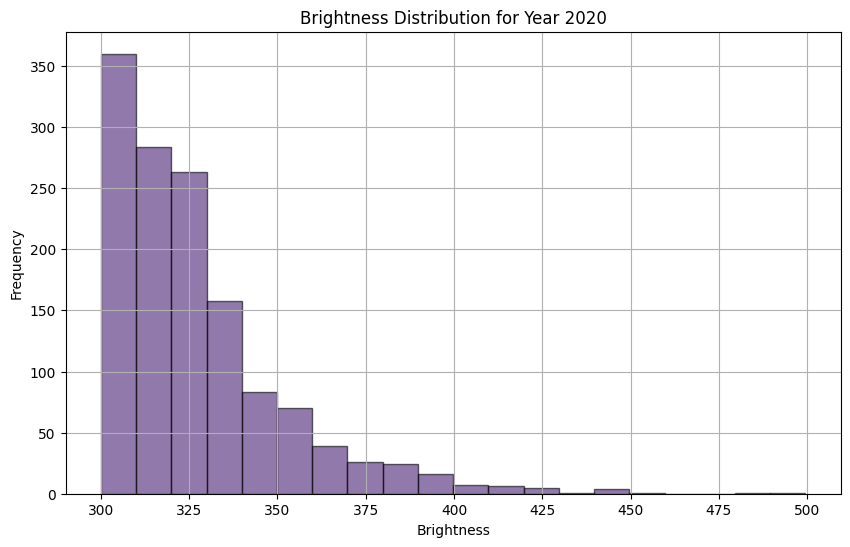

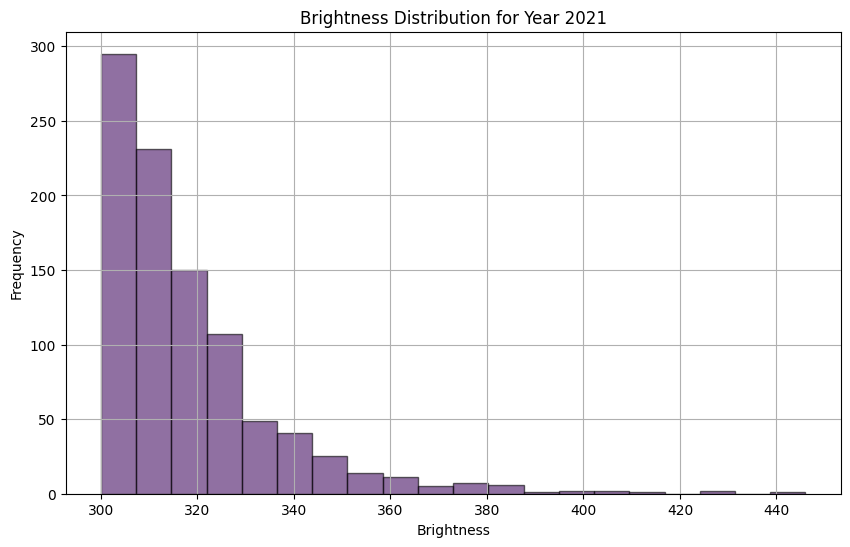

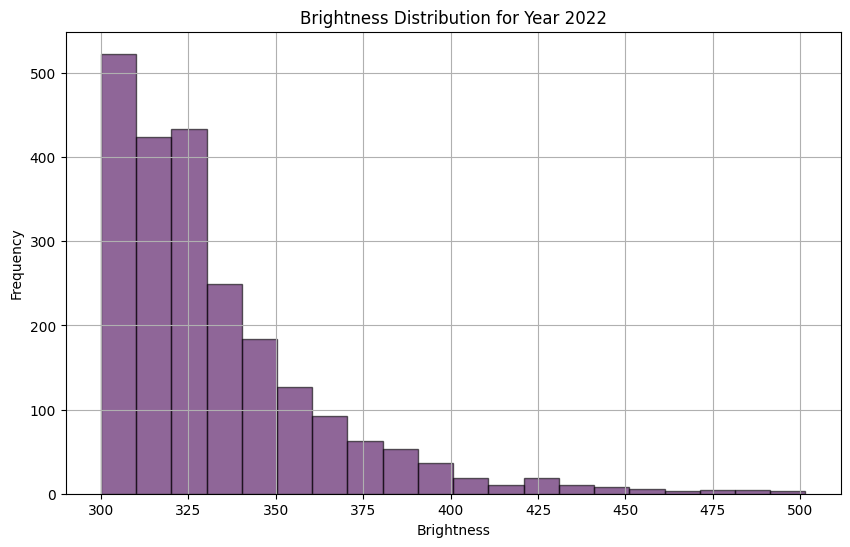

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df contains brightness values and a year column

# Define colors for each year
unique_years = portugal_fires['Year'].unique()
colors = plt.cm.viridis_r(np.linspace(0, 1, len(unique_years)))  # Adjust colormap as needed

# Create separate plots for each year
for i, year in enumerate(unique_years):
    subset_df = portugal_fires[portugal_fires['Year'] == year]
    
    plt.figure(figsize=(10, 6))
    
    # Plot brightness distribution
    plt.hist(subset_df['brightness'], bins=20, color=colors[i], edgecolor='black', alpha=0.6)
    
    plt.title(f'Brightness Distribution for Year {year}')
    plt.xlabel('Brightness')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()





In [25]:
portugal_fires.shape

(68010, 16)

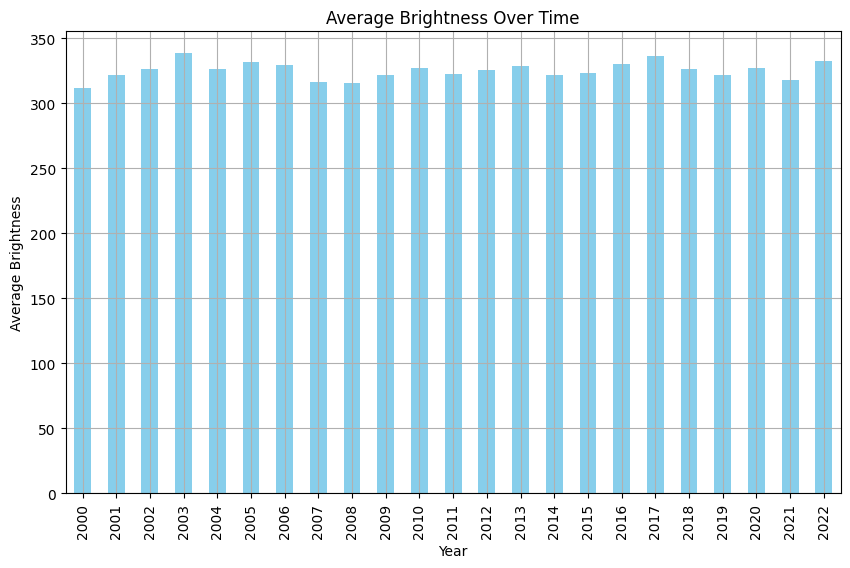

In [30]:
import matplotlib.pyplot as plt

# Assuming df contains brightness values and a year column
# Calculate average brightness for each year
average_brightness = portugal_fires.groupby('Year')['brightness'].mean()

# Plot average brightness over time
plt.figure(figsize=(10, 6))
average_brightness.plot(kind='bar', color='skyblue')

plt.title('Average Brightness Over Time')
plt.xlabel('Year')
plt.ylabel('Average Brightness')
plt.grid(True)
plt.show()


In [33]:
portugal_fires['acq_date'] = pd.to_datetime(portugal_fires['acq_date'])

# Add a new column for month name
portugal_fires['Month'] = portugal_fires['acq_date'].dt.month_name()

# Display the DataFrame to verify the changes
print(portugal_fires.head())

   latitude  longitude  brightness  scan  track   acq_date  acq_time  \
0   39.4605    -8.5570       300.6   1.0    1.0 2000-11-06      1151   
1   37.7087    -7.7873       306.6   1.0    1.0 2000-11-08      1139   
2   37.6988    -7.7845       327.9   1.0    1.0 2000-11-08      1139   
3   32.7630   -17.2021       307.5   1.0    1.0 2001-02-13      2323   
4   41.4451    -7.6717       306.9   1.0    1.0 2001-02-19      1142   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  \
0     Terra      MODIS          40      6.2       287.8   4.9        D     0   
1     Terra      MODIS          64      6.2       286.7   6.2        D     0   
2     Terra      MODIS          85      6.2       290.6  26.2        D     0   
3     Terra      MODIS          54      6.2       282.2  12.0        N     0   
4     Terra      MODIS          64      6.2       283.2   9.9        D     0   

   Year  Day_of_Year     Month  
0  2000          311  November  
1  2000          313

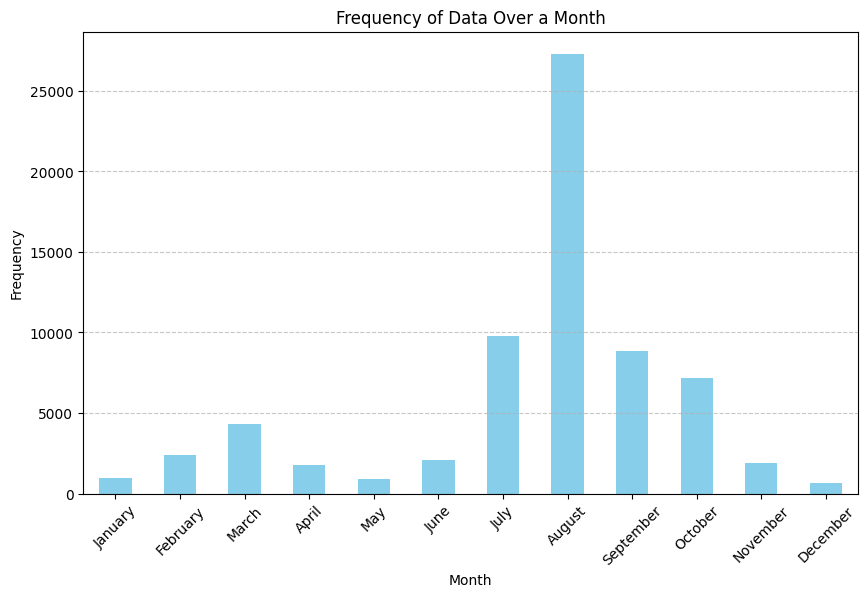

In [35]:

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Group data by month and calculate frequency
monthly_frequency = portugal_fires['Month'].value_counts().reindex(month_order)

# Plot the frequency of data over a month
plt.figure(figsize=(10, 6))
monthly_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Data Over a Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



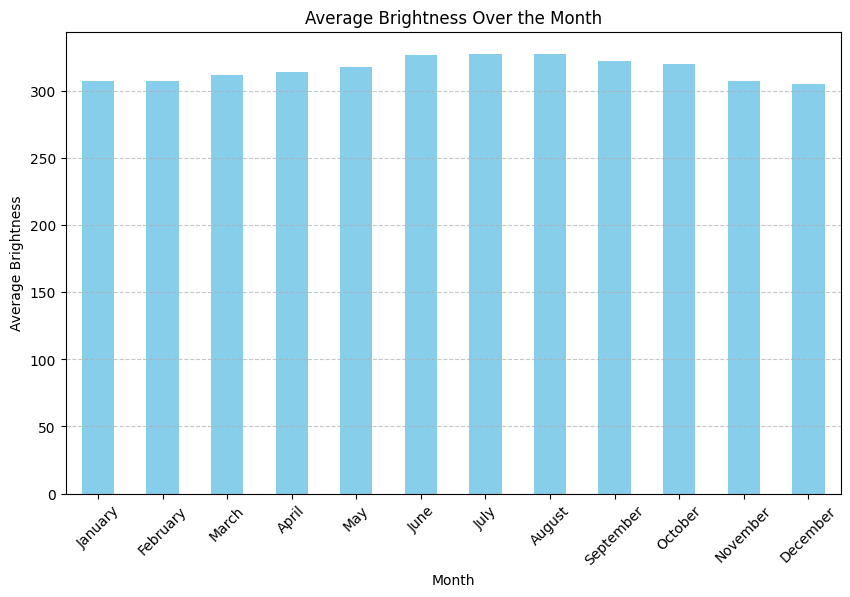

In [39]:
average_brightness_monthly = portugal_fires.groupby('Month')['brightness'].median().reindex(month_order)

# Plot average brightness over the month
plt.figure(figsize=(10, 6))
average_brightness_monthly.plot(kind='bar', color='skyblue')
plt.title('Average Brightness Over the Month')
plt.xlabel('Month')
plt.ylabel('Average Brightness')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()